## Import the dataset from the Kaggle website

In [ ]:
from google.colab import files
files.upload() # upload the json file given from Kaggle API

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jacobbrodriguez","key":"84c5f64ae87c9aa2ebbc646c5ac8db1e"}'}

In [ ]:
!mkdir /root/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c conways-reverse-game-of-life-2020

  0% 0.00/4.06M [00:00<?, ?B/s]
100% 4.06M/4.06M [00:00<00:00, 37.4MB/s]
  0% 0.00/281k [00:00<?, ?B/s]
100% 281k/281k [00:00<00:00, 89.7MB/s]
  0% 0.00/7.91M [00:00<?, ?B/s]
100% 7.91M/7.91M [00:00<00:00, 72.7MB/s]


In [ ]:
! unzip sample_submission.csv.zip
! unzip test.csv.zip
! unzip train.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
# Will be exploring the training dataset
train_df = pd.read_csv("train.csv")
train_df.head()

,id,delta,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,start_8,start_9,start_10,start_11,start_12,start_13,start_14,start_15,start_16,start_17,start_18,start_19,start_20,start_21,start_22,start_23,start_24,start_25,start_26,start_27,start_28,start_29,start_30,start_31,start_32,start_33,start_34,start_35,start_36,start_37,...,stop_585,stop_586,stop_587,stop_588,stop_589,stop_590,stop_591,stop_592,stop_593,stop_594,stop_595,stop_596,stop_597,stop_598,stop_599,stop_600,stop_601,stop_602,stop_603,stop_604,stop_605,stop_606,stop_607,stop_608,stop_609,stop_610,stop_611,stop_612,stop_613,stop_614,stop_615,stop_616,stop_617,stop_618,stop_619,stop_620,stop_621,stop_622,stop_623,stop_624
0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,3,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


#### Drop the id column - is just a copy of index

In [ ]:
train_df.drop(columns={"id"}, inplace=True)


## Data Preprocessing

### Check if missing data

In [ ]:
train_df.isnull().sum().sum()
# No missing values in dataset

0

### All features are needed for the board itself in order to play - minus the *delta* column

## Visualization of some start and stop boards
### Note: Yellow indicates the tile is active

Text(0.5, 1.0, 'Start Board')

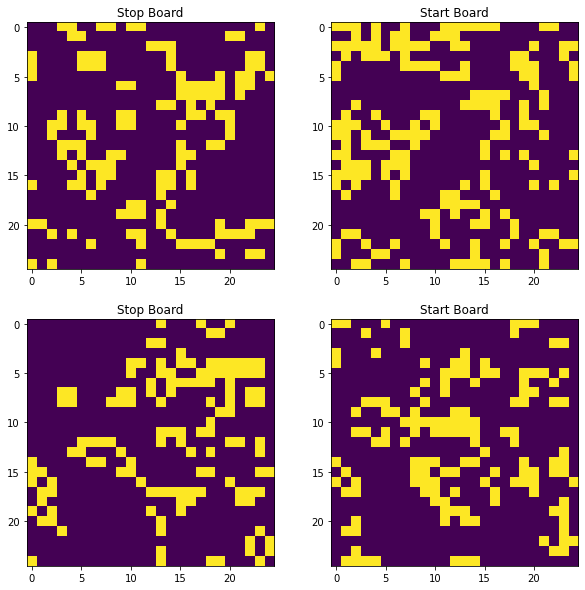

In [ ]:
import matplotlib.pyplot as plt
# Getting the end board and plotting
single = train_df.iloc[25,626:]
single_re = single.values.reshape(25,25)

single = train_df.iloc[48,626:]
single_re_2 = single.values.reshape(25,25)

# Doing the same but for the instance's start board
single = train_df.iloc[25,1:626]
single_start = single.values.reshape(25,25)

single = train_df.iloc[48,1:626]
single_start_2 = single.values.reshape(25,25)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(single_re)
ax[0,0].set_title("Stop Board")

ax[0,1].imshow(single_start)
ax[0,1].set_title("Start Board")

ax[1,0].imshow(single_re_2)
ax[1,0].set_title("Stop Board")

ax[1,1].imshow(single_start_2)
ax[1,1].set_title("Start Board")

### Histogram of most frequent tiles that are alive

In [ ]:
start_features = [f for f in train_df.columns if "start" in f]
stop_features = [f for f in train_df.columns if "stop" in f]
bin_start = []
bin_stop = []
for feature in start_features:
  bin_start.append(train_df[feature].value_counts()[1])
for feature in stop_features:
  bin_stop.append(train_df[feature].value_counts()[1])


'\n#plt.hist(bin_start, bins=625, density=True, label=start_features)\nplt.bar(start_features, height=bin_start)\nplt.show()\n\n#plt.hist(bin_stop, bins=625, density=True)\nplt.bar(stop_features, height=bin_stop)\nplt.show()\n'

Text(0.5, 1.0, 'Start Board count of active instances per tile')

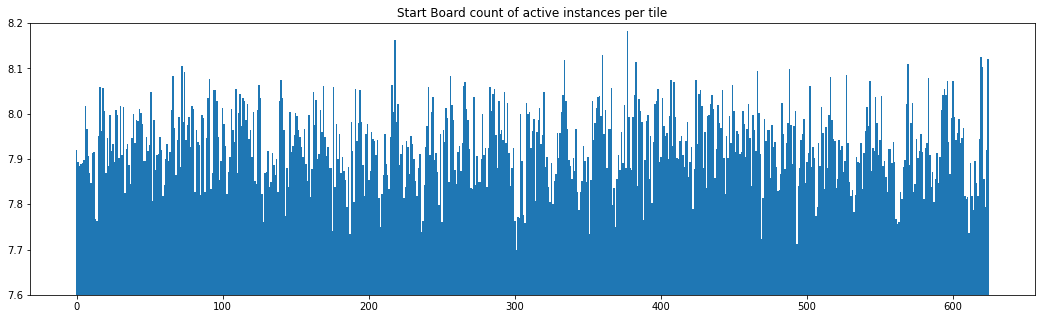

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt
xs = np.arange(len(bin_start))
newList = [x / 1000 for x in bin_start]
f, ax = plt.subplots(figsize=(18,5))
plt.bar(xs, newList, width=1)
plt.ylim(7.6,8.2)
ax.set_title("Start Board count of active instances per tile")

Text(0.5, 1.0, 'Stop Board count of active instances per tile')

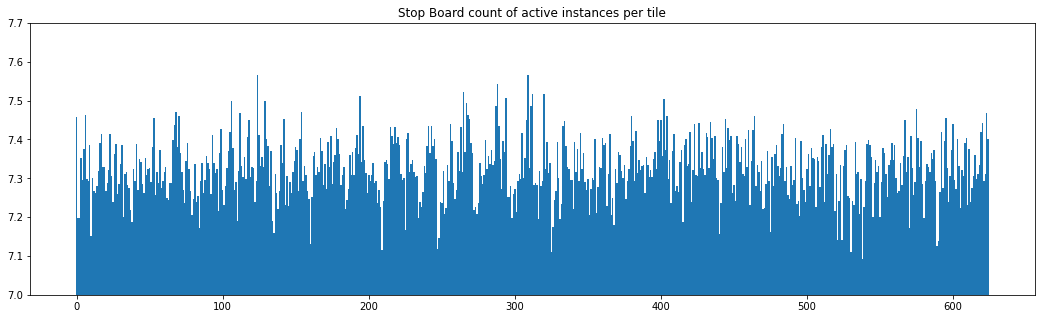

In [ ]:
xs = np.arange(len(bin_stop))
newList = [x / 1000 for x in bin_stop]
f, ax = plt.subplots(figsize=(18,5))
plt.bar(xs, newList, width=1)
plt.ylim(7,7.7)
ax.set_title("Stop Board count of active instances per tile")